In [14]:
import numpy as np

As on slides, SVD of matrix $A$ is: 

$A = UDV^T$

Where: 

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

In [15]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [16]:
U, d, VT = np.linalg.svd(A)

In [17]:
U # left singular vectors

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [18]:
d # diagonal vectors of singular values

array([8.66918448, 4.10429538])

$D$ must have the same dimensions as $A$ for $UDV^T$ matrix multiplication to be possible: 

In [19]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [20]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [21]:
np.dot(U, np.dot(D, VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

SVD and eigendecomposition are closely related to each other: 

* Left-singular vectors of $A$ = eigenvectors of $AA^T$.
* Right-singular vectors of $A$ = eigenvectors of $A^TA$.
* Non-zero singular values of $A$ = square roots of eigenvalues of $AA^T$ = square roots of eigenvalues of $A^TA$


In [22]:
import torch

In [23]:
B = torch.tensor([[25,2,-5],[3,-2,1],[5,7,4.]])
B

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [24]:
Ub , db, VTb = torch.linalg.svd(B)

* Left-singular vectors of $A$ = eigenvectors of $AA^T$.


In [25]:
Ub

tensor([[-0.9757, -0.1823, -0.1214],
        [-0.0975, -0.1350,  0.9860],
        [-0.1961,  0.9739,  0.1140]])

In [26]:
AAT = torch.matmul(B, B.T)
AAT

tensor([[654.,  66., 119.],
        [ 66.,  14.,   5.],
        [119.,   5.,  90.]])

In [27]:
lambdas,EV = torch.linalg.eig(AAT)
EV

tensor([[ 0.9757+0.j,  0.1823+0.j,  0.1214+0.j],
        [ 0.0975+0.j,  0.1350+0.j, -0.9860+0.j],
        [ 0.1961+0.j, -0.9739+0.j, -0.1140+0.j]])

* Right-singular vectors of $A$ = eigenvectors of $A^TA$.


In [28]:
VTb

tensor([[-0.9810, -0.1196,  0.1528],
        [-0.0113,  0.8211,  0.5706],
        [ 0.1937, -0.5581,  0.8069]])

In [29]:
ATA = torch.matmul(B.T, B)


In [30]:
lambdas2,EV2 = torch.linalg.eig(ATA)
EV2

tensor([[ 0.9810+0.j,  0.1937+0.j, -0.0113+0.j],
        [ 0.1196+0.j, -0.5581+0.j,  0.8211+0.j],
        [-0.1528+0.j,  0.8069+0.j,  0.5706+0.j]])

# Image Compression by SVD

In [31]:
from PIL import Image
import matplotlib.pyplot as plt


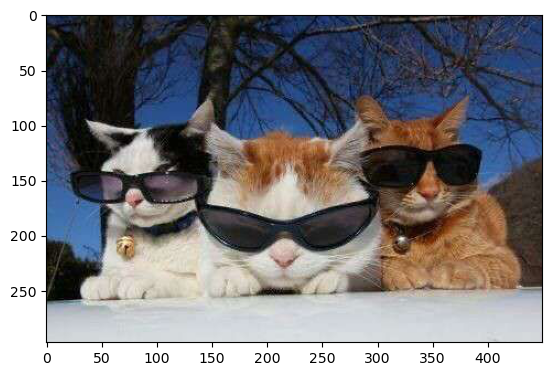

In [32]:
img = Image.open('./photos/download.jpeg')
plt.imshow(img)

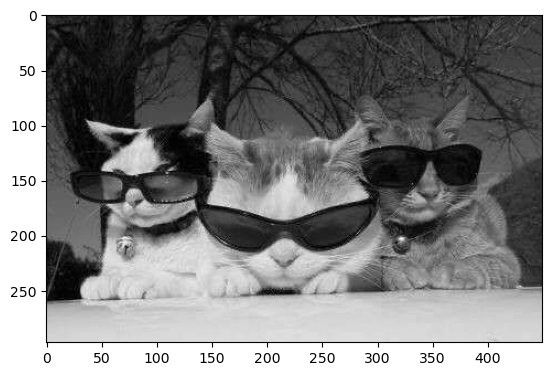

In [33]:
# now coverting the image into grayscale to reduce the number of channels
img_gray = img.convert('LA')
plt.imshow(img_gray)

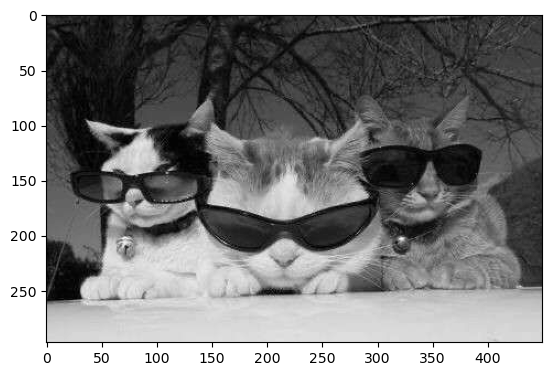

In [42]:
# now coverting the image into a numpy matrix

img_np = np.array(list(img_gray.getdata(band=0)), float)
img_np.shape = (img_gray.size[1], img_gray.size[0])
img_np = np.matrix(img_np)
plt.imshow(img_np, cmap='gray')


## Code Explanation

This code converts a grayscale image (`img_gray`) into a NumPy matrix and visualizes it using Matplotlib:

1. **Convert Pixel Data to Array**  
   `img_np = np.array(list(img_gray.getdata(band=0)), float)`  
   Retrieves grayscale pixel values and converts them into a float NumPy array.

2. **Reshape to Match Image Dimensions**  
   `img_np.shape = (img_gray.size[1], img_gray.size[0])`  
   Reshapes the array into a 2D matrix matching the image's height and width.

3. **Matrix Conversion**  
   `img_np = np.matrix(img_np)`  
   Converts the array to a NumPy matrix.

4. **Visualize the Image**  
   `plt.imshow(img_np, cmap='gray')`  
   Displays the matrix as a grayscale image.

This process is useful for image processing and analysis tasks.


In [43]:
# now calculation of SVD of the image
U,d ,V = np.linalg.svd(img_np)

matrix([[-0.03128195, -0.03166922, -0.03192316, -0.03219365, -0.03246082,
         -0.03231971, -0.03213347, -0.03228177, -0.03132328, -0.03132819,
         -0.03111353, -0.03103081, -0.03123317, -0.03117141, -0.03107877,
         -0.03113568, -0.03030162, -0.02986288, -0.02946856, -0.02906815,
         -0.02898295, -0.02915524, -0.02907958, -0.0290768 , -0.02892616,
         -0.02919198, -0.0295453 , -0.02912422, -0.02914985, -0.02872307,
         -0.02937877, -0.0311642 , -0.03368999, -0.03492399, -0.0356857 ,
         -0.03603467, -0.03688228, -0.03757529, -0.03793562, -0.03841617,
         -0.03889638, -0.03896806, -0.03925392, -0.03959462, -0.03975453,
         -0.03993661, -0.04026042, -0.04056556, -0.04142005, -0.04055007,
         -0.03966932, -0.04142224, -0.04407511, -0.04625217, -0.04841939,
         -0.05042349, -0.05148434, -0.05167125, -0.05233341, -0.05301577,
         -0.05324505, -0.05319517, -0.05290421, -0.05246107, -0.05132191,
         -0.05135032, -0.05206911, -0.

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $D$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $U$ and first right-singular vector of $V$ may represent the most prominent feature of the image: 

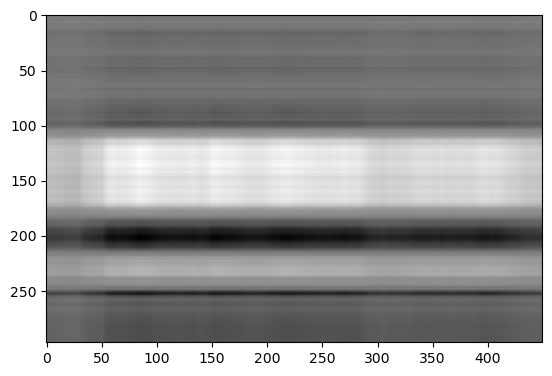

In [48]:
reconstimg = np.matrix(U[:,1])* np.diag(d[:1]) * np.matrix(V[:1,:])
plt.imshow(reconstimg, cmap='gray')


 **Reconstruction Using SVD**  
   `reconstimg = np.matrix(U[:,1]) * np.diag(d[:1]) * np.matrix(V[:1,:])`  
   - `U`, `d`, and `V` are components from the SVD of the original image.  
   - `U[:,1]`: Selects the second column of the matrix `U`.  
   - `d[:1]`: Uses the first singular value to create a diagonal matrix.  
   - `V[:1,:]`: Selects the first row of the matrix `V`.  
   - The product reconstructs an approximation of the image with reduced components.




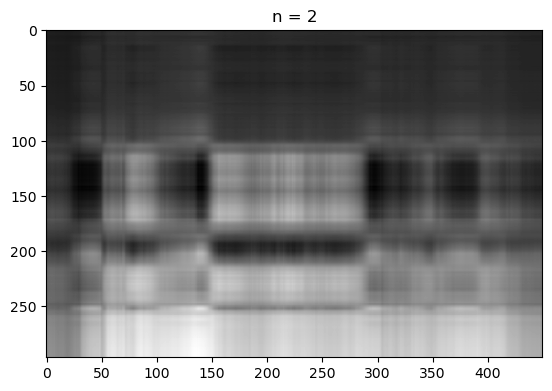

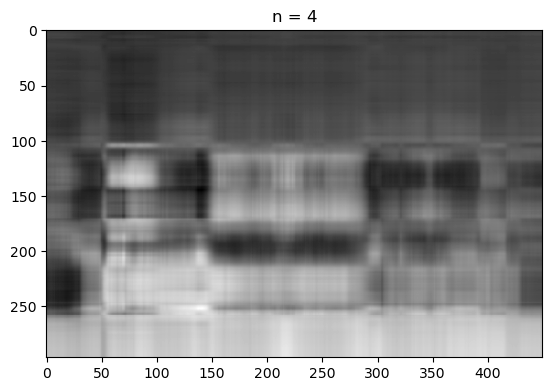

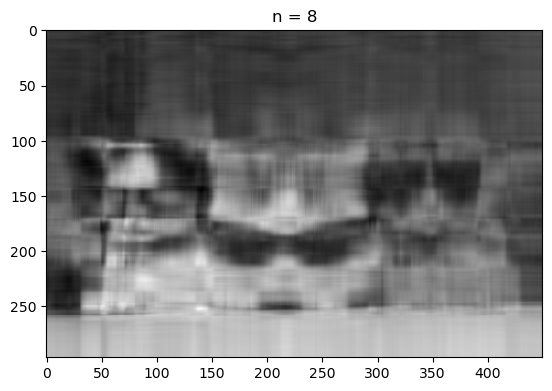

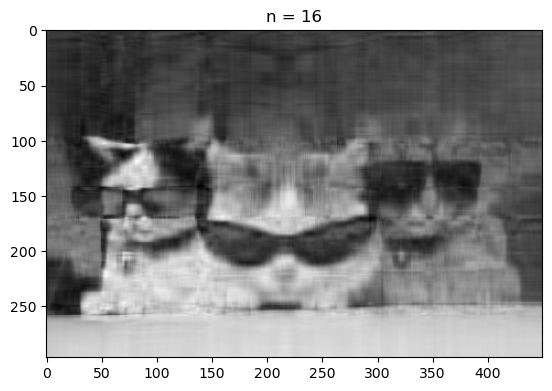

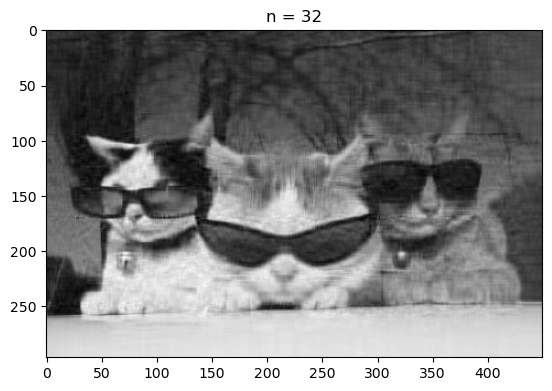

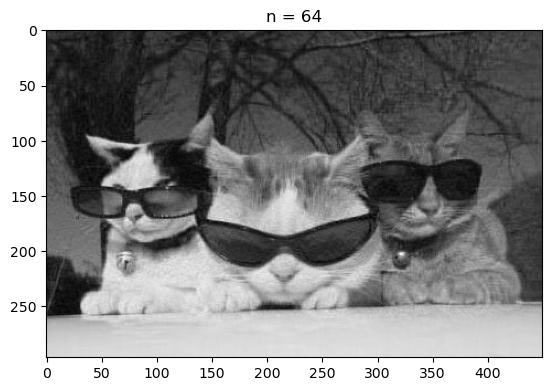

In [49]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(d[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [50]:
img_np.shape

(297, 450)

In [55]:
full_representation = 297 * 450
full_representation
# the original image has 133650 pixels

133650

In [56]:
svd64 = 64 * (297 + 450 + 1)
svd64
# the 64 singular value representation has 47872 pixels

47872

In [57]:
svd64 / full_representation
# the 64 singular value representation has 0.358% of the original image

0.35818930041152264